In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import zipfile

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmaod 600 ~/.kaggle/kaggle.json

! kaggle datasets download imetomi/eur-usd-forex-pair-historical-data-2002-2019 #scarico il dataset direttamente da kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists
/bin/bash: chmaod: command not found
 84% 97.0M/116M [00:00<00:00, 128MB/s]
100% 116M/116M [00:00<00:00, 141MB/s] 


In [ ]:
with zipfile.ZipFile("/content/eur-usd-forex-pair-historical-data-2002-2019.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

In [ ]:
df = pd.read_csv('eurusd_minute.csv',index_col=0,parse_dates=True)
#rimuovo la colonna dell'ora
df.drop('Time', inplace=True, axis=1) #mi dava problemi con il "pipe.fit"

import datetime

start_train = datetime.datetime(2005, 1, 1,0,0)
end_train = datetime.datetime(2015, 12, 31, 0, 0)
start_test = datetime.datetime(2016, 1, 1,0,0)
end_test = datetime.datetime(2020, 4, 29, 0, 0)

#Prendiamo i dati necessari per il training
df_train=df.loc[start_train:end_train]
X_train=df_train.drop("BC", axis=1).values
Y_train=df_train["BC"].values

#Prendiamo i dati necessari per il testing

df_test=df.loc[start_test:end_test]
X_test=df_test.drop("BC", axis=1).values
Y_test=df_test["BC"].values

#Standardizziamo i dati e alleniamo il regressore

pipe=make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train,Y_train)

#Facciamo la nostra predizione sui dati di testing
Y_pred = pipe.predict(X_test)

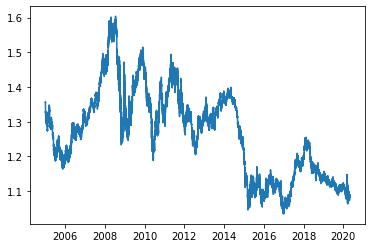

In [ ]:
#Andamento della coppia EUR/USD

df = pd.read_csv('eurusd_minute.csv',index_col=0,parse_dates=True)
plt.plot(df["BC"])
plt.show()

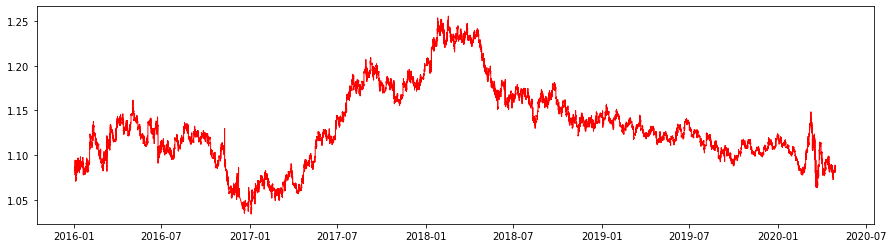

In [ ]:
#Plottiamo anche i dati di testing e la predizione fatta dal regressore

f = plt.figure()
f.set_figwidth(15)
#plt.plot(df_test.index,Y_test,color='green',linewidth=3)
plt.plot(df_test.index,Y_pred,color='red',linewidth=1)
plt.show()

In [ ]:
df.head()

,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
Date,,,,,,,,,,
2005-01-02,1.3555,1.3555,1.3555,1.3555,0.0,1.3565,1.3565,1.3565,1.3565,0.0
2005-01-02,1.3555,1.3555,1.3555,1.3555,0.0,1.3565,1.3565,1.3565,1.3565,0.0
2005-01-02,1.3562,1.3562,1.3562,1.3562,0.0,1.3572,1.3572,1.3572,1.3572,0.0
2005-01-02,1.3560,1.3560,1.3560,1.3560,0.0,1.3570,1.3570,1.3570,1.3570,0.0
2005-01-02,1.3563,1.3563,1.3563,1.3563,0.0,1.3573,1.3573,1.3573,1.3573,0.0


In [ ]:
df.tail()

In [ ]:
errore = mean_squared_error(Y_test, Y_pred)
print("Errore:", errore)

Errore: 7.018359014287569e-31


In [ ]:
punteggio = r2_score(Y_test, Y_pred)
print("Score:", punteggio)

Score: 1.0


In [ ]:
#TEST
pipe=make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train,Y_train)

Y_pred = pipe.predict(X_test)

errore = mean_squared_error(Y_test, Y_pred)
punteggio = r2_score(Y_test, Y_pred)

In [ ]:
#Ora prendiamo come variabile di input solo il valore di apertura

X_train=df_train["BO"].values
Y_train=df_train["BC"].values

X_test=df_test["BO"].values
Y_test=df_test["BC"].values

#Rifacciamo gli stessi passaggi di prima
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
pipe=make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train,Y_train)

#Facciamo la nostra predizione sui dati di testing
Y_pred = pipe.predict(X_test)

In [ ]:
#Misuriamo di nuovo l'errore:
errore = mean_squared_error(Y_test, Y_pred)
print("Errore:", errore)
punteggio = r2_score(Y_test, Y_pred)
print("Score:", punteggio)

Errore: 2.229595654131465e-08
Score: 0.9999885138213932


In [ ]:
#Rifacciamo di nuovo tutto ma questa volta come parametro di input abbiamo solo la data:

X_train=df_train.index.values
Y_train=df_train["BC"].values

X_test=df_test.index.values
Y_test=df_test["BC"].values

#Rifacciamo gli stessi passaggi di prima
X_train=X_train.reshape(-1,1) #serve per fare il fit. Il fit si aspetta un array 2D ma nel nostro caso abbiamo solo una feature
X_test=X_test.reshape(-1,1)
pipe=make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train,Y_train)

#Facciamo la nostra predizione sui dati di testing
Y_pred = pipe.predict(X_test)

#Misuriamo di nuovo l'errore:
errore = mean_squared_error(Y_test, Y_pred)
print("Errore:", errore)
punteggio = r2_score(Y_test, Y_pred)
print("Score:", punteggio)

Errore: 0.01818852599584469
Score: -8.370159014970195
